<a href="https://colab.research.google.com/github/gmazzitelli/studenti/blob/master/scope_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('font', size = 14, family ='Sans-Serif')

In [2]:
from google.colab import drive
drive.mount('/content/drive')
#!ls -lh /content/drive/My\ Drive/Colab\ Notebooks
df = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/waveform.plk.gz', compression='gzip')
print (len(df))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
952


In [0]:
#df['Dt']=np.array(df['Dt'].values, dtype=float)

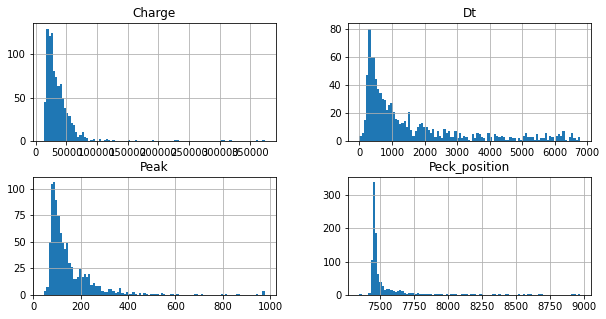

,Charge,Peak,Peck_position,Dt
count,952.000000,952.000000,952.000000,952.000000
mean,37199.748625,155.901433,7524.515756,1607.014706
std,29606.788457,117.276577,186.881531,1672.581720
min,13541.767578,45.820312,7348.125000,0.000000
25%,22621.488037,89.946289,7450.875000,434.000000
50%,30052.550659,117.778320,7463.250000,909.000000
75%,43148.850708,184.152832,7501.625000,2076.750000
max,373246.370850,976.562500,8968.625000,6780.000000


In [4]:
df.hist(bins=100, figsize=(10,5))
plt.show()
df.describe()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


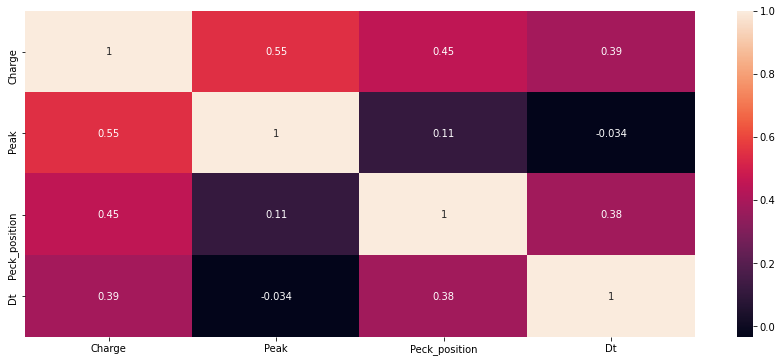

,Charge,Peak,Peck_position,Dt
Charge,1.000000,0.548206,0.452520,0.388354
Peak,0.548206,1.000000,0.113718,-0.033916
Peck_position,0.452520,0.113718,1.000000,0.380892
Dt,0.388354,-0.033916,0.380892,1.000000


In [5]:
import seaborn as sns
plt.figure(figsize = (15,6))
sns.heatmap(df.corr(), annot=True)
plt.show()
df[['Charge', 'Peak', 'Peck_position', 'Dt']].corr()

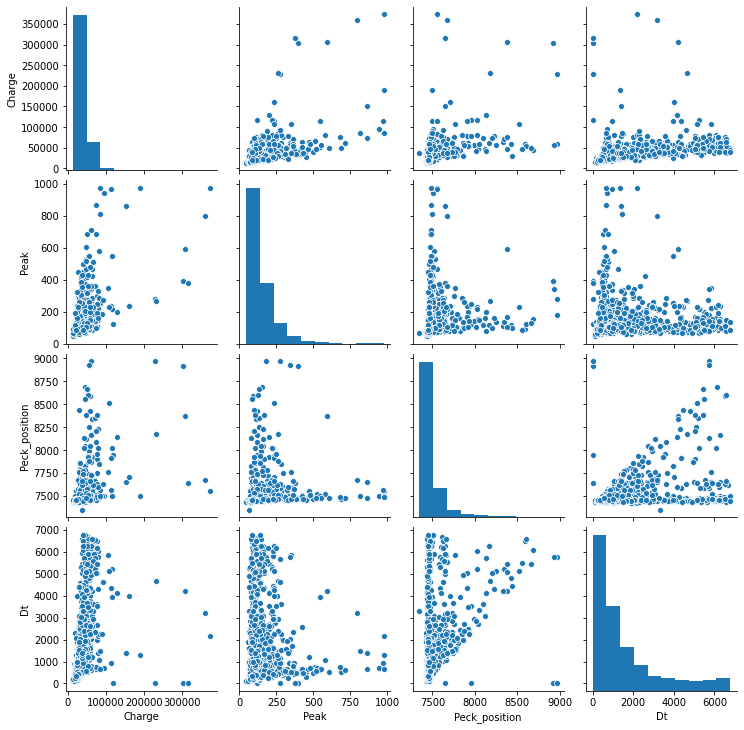

In [6]:
sns.pairplot(df[['Charge', 'Peak', 'Peck_position', 'Dt']])
plt.show()

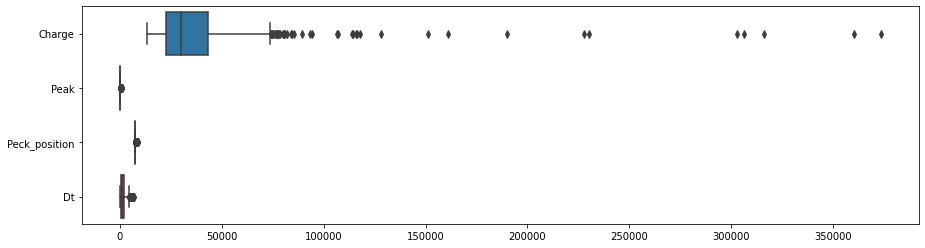

In [7]:
plt.figure(figsize = (15,4))
sns.boxplot(data = df[['Charge', 'Peak', 'Peck_position', 'Dt']], orient = "h")
plt.show()

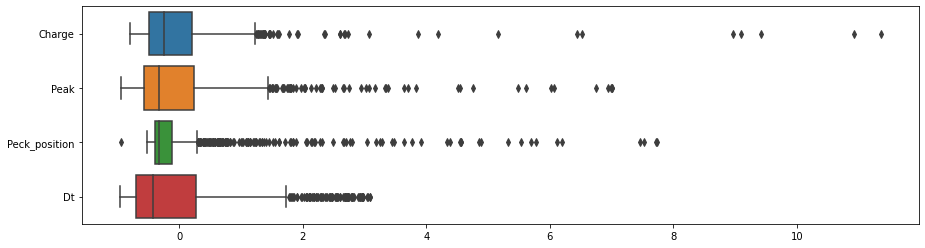

,Charge,Peak,Peck_position,Dt
count,9.520000e+02,9.520000e+02,9.520000e+02,9.520000e+02
mean,8.425800e-17,-6.017595e-17,-1.333201e-15,-4.571507e-17
std,1.000526e+00,1.000526e+00,1.000526e+00,1.000526e+00
min,-7.994929e-01,-9.391388e-01,-9.443602e-01,-9.613039e-01
25%,-4.926547e-01,-5.626853e-01,-3.942576e-01,-7.016884e-01
50%,-2.415309e-01,-3.252410e-01,-3.280044e-01,-4.175471e-01
75%,2.010427e-01,2.410221e-01,-1.225524e-01,2.809921e-01
max,1.135629e+01,7.001333e+00,7.731467e+00,3.094440e+00


In [8]:
# normalizzazione delle variabili

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df[['Charge', 'Peak', 'Peck_position', 'Dt']])
scaled_dataframe = pd.DataFrame( scaled_array, columns = ['Charge', 'Peak', 'Peck_position', 'Dt'] ) # df.colums per tutte e colonne
plt.figure(figsize = (15,4))
sns.boxplot(data = scaled_dataframe, orient = "h")
plt.show()
scaled_dataframe.describe()

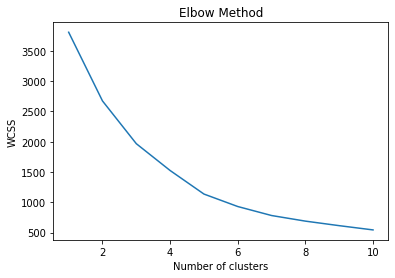

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_dataframe)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [0]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(scaled_dataframe)
df['cluster'] = kmeans.labels_

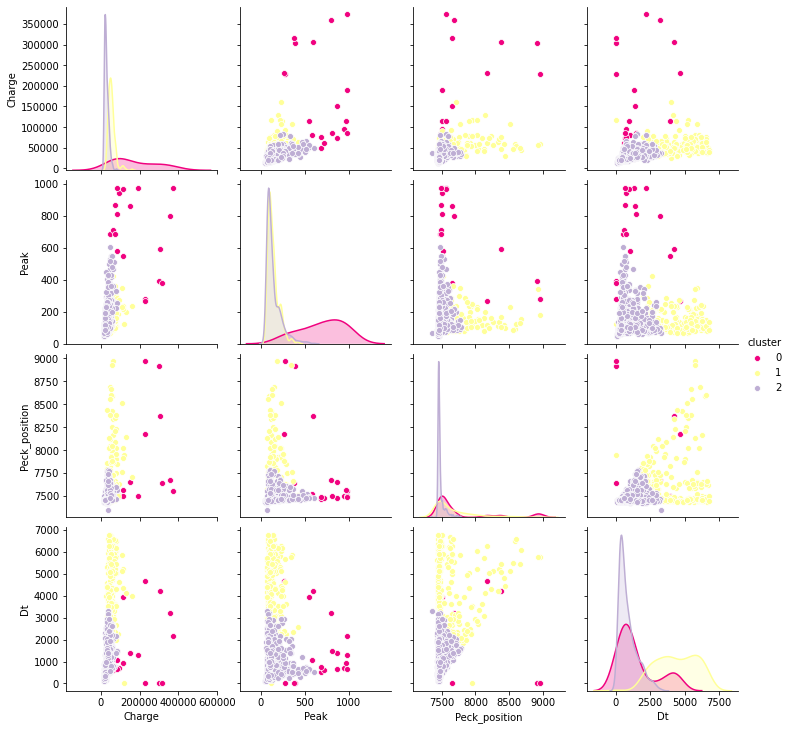

In [11]:
sns.pairplot(data = df[['Charge', 'Peak', 'Peck_position', 'Dt', 'cluster']], hue = "cluster", palette = "Accent_r")
plt.show()

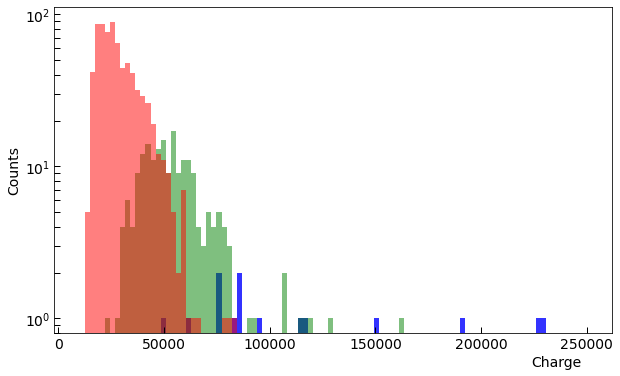

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
from mpl_toolkits.mplot3d import Axes3D

plt.hist(df['Charge'][pred_y==0], bins=100, color='b', alpha=0.8, range=(10000, 250000))
plt.hist(df['Charge'][pred_y==1], bins=100, color='g', alpha=0.5, range=(10000, 250000))
plt.hist(df['Charge'][pred_y==2], bins=100, color='r', alpha=0.5, range=(10000, 250000))
#plt.hist(df['Charge'][pred_y==3], bins=100, color='r', alpha=0.5, range=(10000, 250000))
plt.yscale('Log')
plt.tick_params(axis="both", direction='in', which="both", length=6, width=1, colors='k',
                      grid_color='grey', grid_alpha=0.5)
plt.xlabel('Charge', x=0.9)
plt.ylabel('Counts')
plt.show()

In [0]:
data = df.Charge[(df.Charge>10000) & (df.Charge<250000) & (df.cluster==0)]

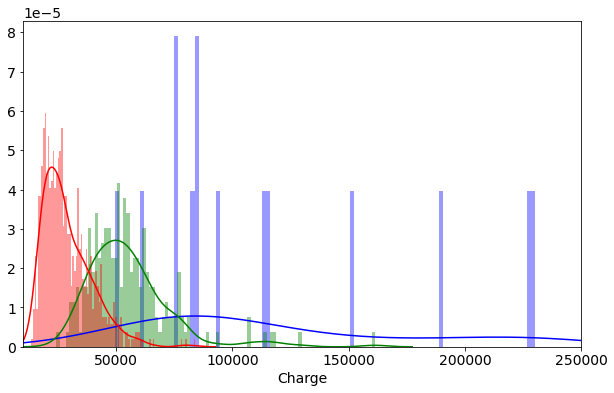

In [39]:
fig, ax = plt.subplots(figsize=(10,6))
data = df.Charge[(df.Charge>10000) & (df.Charge<250000) & (df.cluster==0)]
sns.distplot(data, bins=100, color='b', norm_hist=False)
data = df.Charge[(df.Charge>10000) & (df.Charge<250000) & (df.cluster==1)]
sns.distplot(data, bins=100, color='g', norm_hist=False)
data = df.Charge[(df.Charge>10000) & (df.Charge<250000) & (df.cluster==2)]
sns.distplot(data, bins=100, color='r', norm_hist=False)
plt.xlim(10000, 250000)
#plt.ylim(0, 100)
plt.show()

fit done


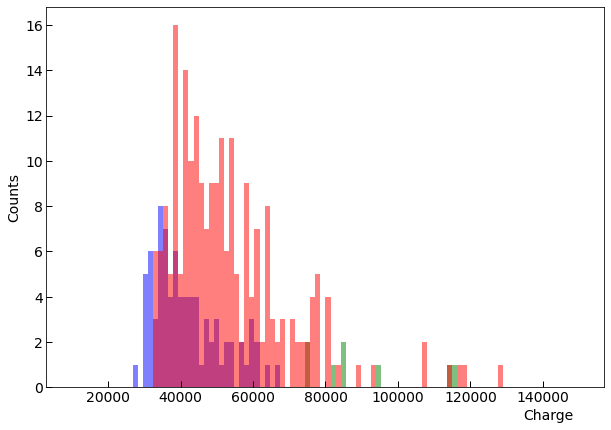

In [40]:
waveforms = []
for i in range (len(df)):
  waveforms.append([df.iloc[i,5]])

kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)

pred_y = kmeans.fit_predict(np.array(waveforms)[:,0])

df['cw'] = kmeans.labels_

print ('fit done')
fig, ax = plt.subplots(figsize=(10,7))

plt.hist(df.Charge[df.cw==0], bins=100, color='b', alpha=0.5, range=(10000, 150000))
plt.hist(df.Charge[df.cw==4], bins=100, color='g', alpha=0.5, range=(10000, 150000))
plt.hist(df.Charge[df.cw==5], bins=100, color='r', alpha=0.5, range=(10000, 150000))
#plt.yscale('Log')
#ax.ylim(top=20)
plt.tick_params(axis="both", direction='in', which="both", length=6, width=1, colors='k',
                      grid_color='grey', grid_alpha=0.5)
plt.xlabel('Charge', x=0.9)
plt.ylabel('Counts')
plt.show()

fit done


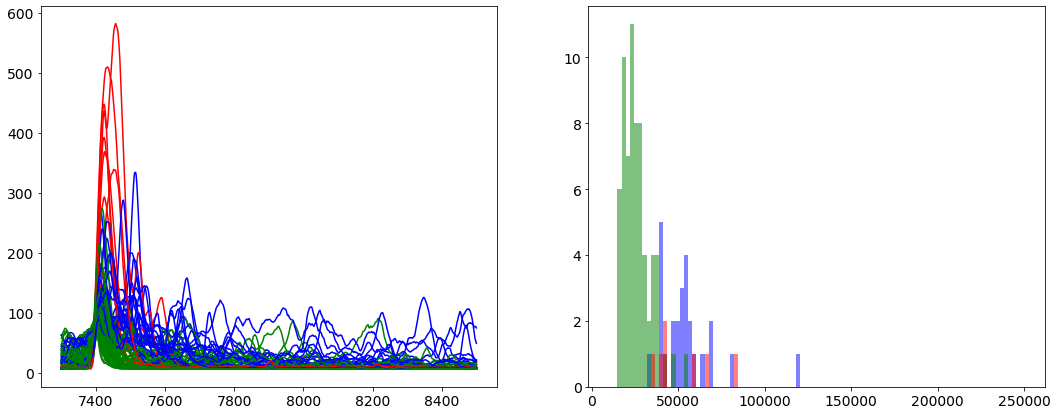

In [61]:
df1= df.head(100).copy()
waveforms = []
for i in range (len(df1)): # len(df) Prende solo i primi 100
  waveforms.append([df1.iloc[i,5]])

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)

pred_y = kmeans.fit_predict(np.array(waveforms)[:,0])

df1['cw'] = kmeans.labels_

print ('fit done')
fig, ax = plt.subplots(1,2, figsize=(18,7))
for i in range(len(pred_y)):
  iTr = df1.iloc[i,0]
  ts = np.linspace(7300, 8500, len(waveforms[i][0]))
  As = waveforms[i][0]
  if pred_y[i] == 0:
    ax[0].plot(ts,As, 'b')
    
  if pred_y[i] == 1:
    ax[0].plot(ts,As, 'g')
    
  if pred_y[i] == 2:
    ax[0].plot(ts,As, 'r')


ax[1].hist(df1.Charge[df1.cw==0], bins=100, color='b', alpha=0.5, range=(10000, 250000))
ax[1].hist(df1.Charge[df1.cw==1], bins=100, color='g', alpha=0.5, range=(10000, 250000))
ax[1].hist(df1.Charge[df1.cw==2], bins=100, color='r', alpha=0.5, range=(10000, 250000))
#ax[1].set_yscale('Log')
plt.show()
